The first 5 rows of the dataset are:
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
Shape: (200, 5)
Missing values:
 CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64
Duplicates: 0
CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object
       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.26472

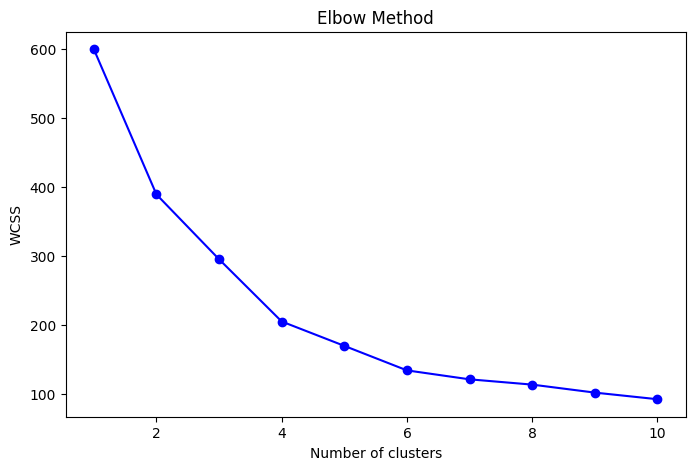

Silhouette Score for 2 clusters: 0.335
Silhouette Score for 3 clusters: 0.358
Silhouette Score for 4 clusters: 0.404
Silhouette Score for 5 clusters: 0.408
Silhouette Score for 6 clusters: 0.431
Silhouette Score for 7 clusters: 0.410
Silhouette Score for 8 clusters: 0.367
Silhouette Score for 9 clusters: 0.374
Silhouette Score for 10 clusters: 0.362


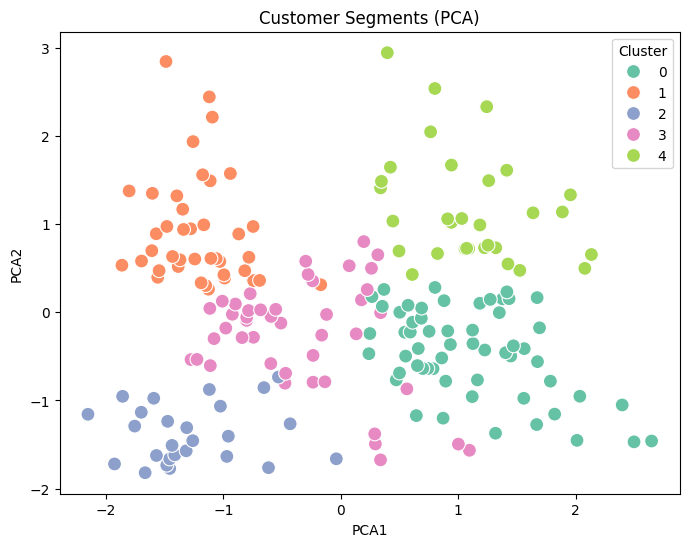

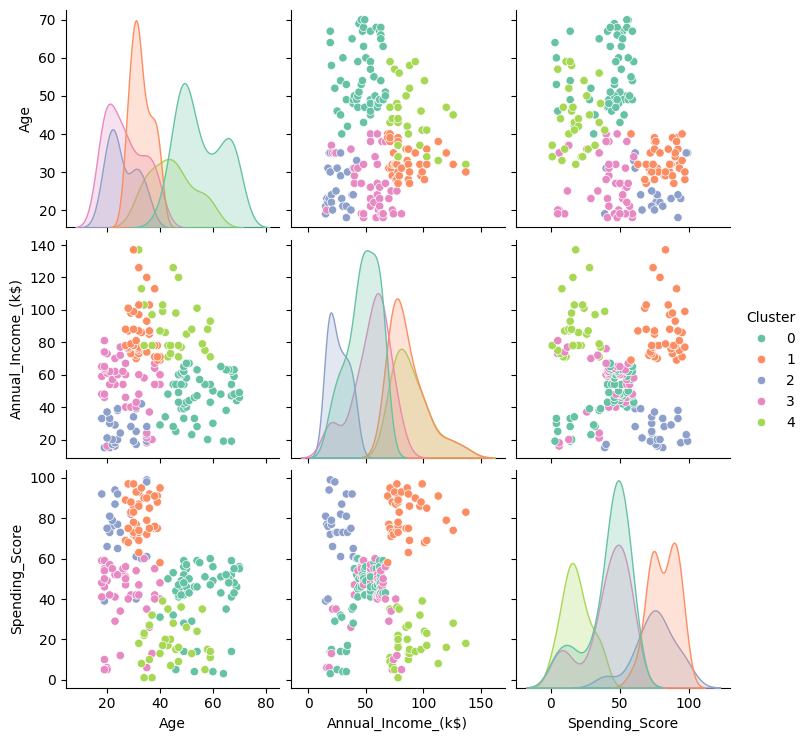


Cluster Centroids (original scale):
         Age  Annual_Income_(k$)  Spending_Score
0  55.275862           47.620690       41.706897
1  32.875000           86.100000       81.525000
2  25.769231           26.115385       74.846154
3  26.733333           54.311111       40.911111
4  44.387097           89.774194       18.483871
Clustered dataset saved as clustered_customer_data.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-3\customer_data.csv"
df = pd.read_csv(file_path, delimiter=',')
print("The first 5 rows of the dataset are:")
print(df.head()) #display first 5 rows

# Inspect
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print(df.dtypes)
print(df.describe())

# Standardize the dataset
features = ['Age','Annual_Income_(k$)','Spending_Score']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette scores
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for {i} clusters: {score:.3f}")

# Fit KMeans with optimal cluster count
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA)')
plt.show()

# Pair plot
sns.pairplot(df[features + ['Cluster']], hue='Cluster', palette='Set2')
plt.show()

# Cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centroids (original scale):")
print(pd.DataFrame(centroids, columns=features))

# Save clustered dataset
df.to_csv(r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-3\clustered_customer_data.csv", index=False)
print("Clustered dataset saved as clustered_customer_data.csv")